In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
plt.style.use('seaborn')

## Data Preparation

In [33]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


  ## Data Visualise

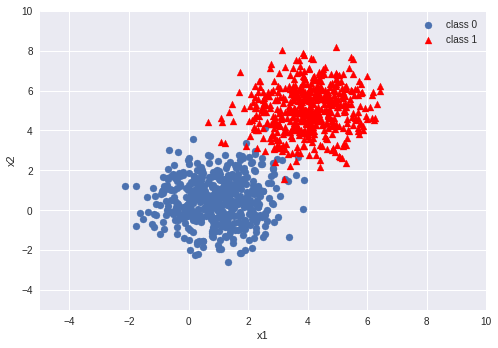

In [34]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label="class 1")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Create training and Test Set

In [35]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [36]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [37]:
np.random.shuffle(data)
print(data[:10])

[[ 2.49463968e+00  5.53739604e+00  1.00000000e+00]
 [-4.32952794e-01  1.38940179e-01  0.00000000e+00]
 [ 4.18888773e+00  3.60551255e+00  1.00000000e+00]
 [ 4.23098164e+00  4.78457535e+00  1.00000000e+00]
 [-9.28101521e-02  6.77553654e-01  0.00000000e+00]
 [-2.17458201e-03  2.50425633e+00  0.00000000e+00]
 [ 4.67349586e+00  5.91864420e+00  1.00000000e+00]
 [ 1.52439861e+00  1.04035522e-01  0.00000000e+00]
 [ 4.50519665e+00  4.31174446e+00  1.00000000e+00]
 [ 2.29222343e+00 -4.30946354e-01  0.00000000e+00]]


In [38]:
split = int(0.8*data.shape[0])

In [39]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic regression function

In [40]:
def hypothesis(x,w,b):
    '''accepts input vecote x, input weight vector w and bias b'''
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    return -err/m #avg error

def get_grads(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i]-hx)
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b] #return as a tuple

#one iteration of gradient descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):

    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return ((y_pred==y_tst).sum())/y_tst.shape[0]
 


In [41]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [42]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

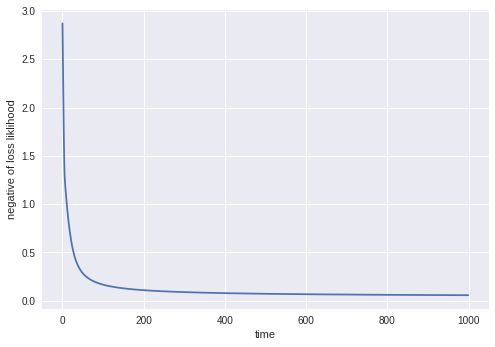

In [43]:
plt.plot(loss)
plt.ylabel("negative of loss liklihood")
plt.xlabel("time")
plt.show()

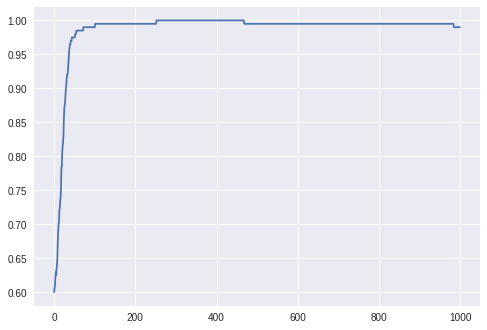

0.99


In [44]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

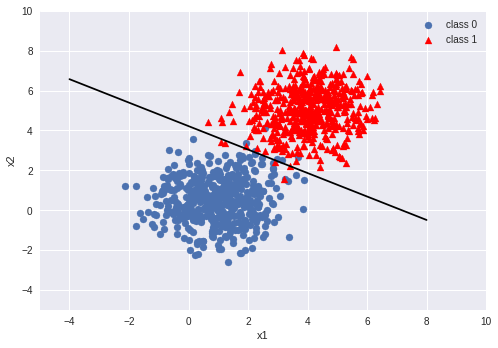

In [45]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label="class 1")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()